In [ ]:
# defaultdict() : key 값 비워두고 value 먼저 채워둘 수 있음 -> 이후 value 값 큐함수로 채워짐
# state 표현을 str으로 -> key 값에 넣음
# agent 안에 q_table 있음을 이해

#Import

In [ ]:
import os
import time
import numpy as np
import pandas as pd
from typing import Tuple
import random
from collections import defaultdict
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive')

In [ ]:
!python GridWorldEnvironment2.py

In [ ]:
from GridWorldEnvironment2 import GridWorldEnvironment

#04 SARSA

## Agent_SA

In [ ]:
class SARSAAgent:
    def __init__(self, action_space):
        # 행동에 관한 parameter
        self.action_space = action_space
        self.num_actions = len(action_space)

        # 학습에 관련된 parameter
        self.step_size = 0.01
        self.discount_factor = 0.9
        self.epsilon = 1.0
        self.epsilon_decay = 0.999
        self.epsilon_min = 0.01

        # 0을 초깃값으로 하는 큐함수 테이블 생성
        self.q_table = defaultdict(lambda : np.zeros(self.num_actions).tolist()) # lambda와 apply 함수

    def update_q_table(self, state, action_idx, reward, next_state, next_action_idx):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay # 탐험을 점점 끝내기 위함

        # idx로 사용하기 위해 (n,n) 좌표로 표현된 state를 문자열로 만든다.
        state, next_state = str(state), str(next_state)

        # 시간차 제어로 q_table을 업데이트한다.
        current_q = self.q_table[state][action_idx] # (딕셔너리 인덱싱 해보기)
        next_q = self.q_table[next_state][next_action_idx]
        td = reward + self.discount_factor * next_q - current_q # td : time difference 시간차
        new_q = current_q + self.step_size * td
        self.q_table[state][action_idx] = new_q

    def get_action(self, state):
        '''
        입실론 탐욕 정책을 통해 행동을 반환한다.
        '''
        # 0을 초깃값으로 하는 큐함수 테이블 생성
        if np.random.rand() < self.epsilon:
            # 무작위 행동 수행
            action_idx = np.random.choice(range(self.num_actions))
        else:
            # 큐함수에 따른 행동
            state = str(state)
            q_list = self.q_table[state]
            action_idx = self.argmax(q_list)

        return action_idx

    def argmax(self, q_list):
        '''
        np.argmax를 사용하지 않고 메소드를 정의하여 사용하는 이유:
        Q-table에 값이 같은 action이 여러 개 있다면,
        그 중에서 랜덤으로 선택해야 하기 때문이다.
        '''
        max_value = np.amax(q_list)
        max_indices = np.where(q_list == max_value)[0]
        return np.random.choice(max_indices)

## main_SA

In [ ]:
# init value
env = GridWorldEnvironment(start_point=(0,0), end_point=(4,4), gridworld_size=(5,5))

agent = SARSAAgent(env.action_space)

EPISODES = 1000
RENDER_PROCESS = False
RENDER_END = False
total_moves = []

In [ ]:
# train code

for episode in range(EPISODES):
    # 게임 환경을 초기화
    state = env.reset()
    move_cnt = 0
    # 현재 상태에서 행동을 선택한다.
    action_idx = agent.get_action(state)

    done = False

    while not done:
        if RENDER_PROCESS:
            env.render() # 이동을 출력하기

        # 취한 행동에 대한 next_state, reward, done을 환경이 제공한다.
        next_state, reward, done = env.step(action_idx)

        # 다음 상태에서 행동을 선택한다.
        next_action_idx = agent.get_action(next_state)

        # 큐함수를 업데이트한다.
        agent.update_q_table(state, action_idx, reward, next_state, next_action_idx)

        state = next_state
        action_idx = next_action_idx
        move_cnt += 1

    total_moves.append(move_cnt)

    if (episode+1) % 100 == 0:
        print(f"[Episode] : {episode+1:>4}/{EPISODES} __ [Num of Moves mean]:{np.mean(total_moves[episode-99]):>5.1f} __ [Epsilon]: {agent.epsilon:.3f}")

    if RENDER_END:
        env.render()

[Episode] :  100/1000 __ [Num of Moves mean]: 57.0 __ [Epsilon]: 0.185
[Episode] :  200/1000 __ [Num of Moves mean]: 16.0 __ [Epsilon]: 0.073
[Episode] :  300/1000 __ [Num of Moves mean]:  8.0 __ [Epsilon]: 0.031
[Episode] :  400/1000 __ [Num of Moves mean]: 10.0 __ [Epsilon]: 0.014
[Episode] :  500/1000 __ [Num of Moves mean]:  8.0 __ [Epsilon]: 0.010
[Episode] :  600/1000 __ [Num of Moves mean]:  8.0 __ [Epsilon]: 0.010
[Episode] :  700/1000 __ [Num of Moves mean]:  8.0 __ [Epsilon]: 0.010
[Episode] :  800/1000 __ [Num of Moves mean]:  8.0 __ [Epsilon]: 0.010
[Episode] :  900/1000 __ [Num of Moves mean]:  8.0 __ [Epsilon]: 0.010
[Episode] : 1000/1000 __ [Num of Moves mean]:  8.0 __ [Epsilon]: 0.010


In [ ]:
# 마지막 학습 상황을 재현한다.
env.render()

S . . . . 
X X . . . 
. X X X . 
. . . X X 
. . . . A 



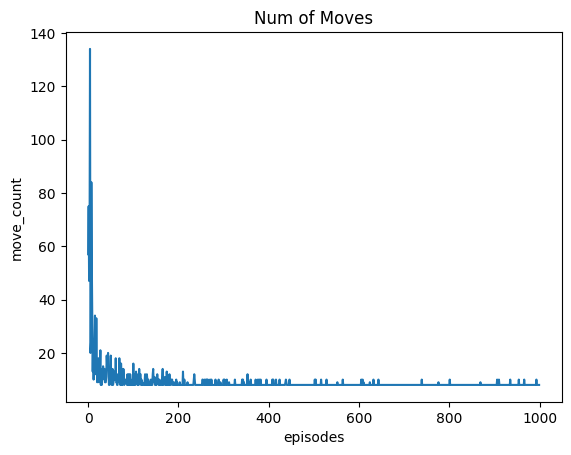

In [ ]:
# 1000 에피소드에서 에이전트의 이동 횟수를 시각화
plt.plot(total_moves)
plt.ylabel("move_count")
plt.xlabel("episodes")
plt.title("Num of Moves")

plt.show()

# 05 Q-Learning

## Agent_QL

In [ ]:
class QlearningAgent:
    def __init__(self, action_space):
        # 행동에 관한 parameter
        self.action_space = action_space
        self.num_actions = len(action_space)

        # 학습에 관련된 parameter
        self.step_size = 0.01
        self.discount_factor = 0.9
        self.epsilon = 1.0
        self.epsilon_decay = 0.999
        self.epsilon_min = 0.01

        # 0을 초깃값으로 하는 큐함수 테이블 생성
        self.q_table = defaultdict(lambda: np.zeros(self.num_actions).tolist())

    def update_q_table(self, state, action_idx, reward, next_state):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

        # idx로 사용하기 위해 (n,n) 좌표로 표현된 state를 문자열로 만든다.
        state, next_state = str(state), str(next_state)

        q_1 = self.q_table[state][action_idx]

        # 벨만 최적 방정식을 사용한 큐함수 업데이트
        q_2 = reward + self.discount_factor * max(self.q_table[next_state])
        self.q_table[state][action_idx] += self.step_size * (q_2 - q_1)

    def get_action(self, state):
        '''
        입실론 탐욕 정책을 통해 행동을 반환한다.
        '''
        # 0을 초깃값으로 하는 큐함수 테이블 생성
        if np.random.rand() < self.epsilon:
            # 무작위 행동 수행
            action_idx = np.random.choice(range(self.num_actions))
        else:
            # 큐함수에 따른 행동
            state = str(state)
            q_list = self.q_table[state]
            action_idx = self.argmax(q_list)

        return action_idx

    def argmax(self, q_list):
        '''
        np.argmax를 사용하지 않고 별도의 메소드를 사용하는 이유
        q_table에 값이 같은 action이 여러 개 있다면,
        그 중에서 랜덤으로 선택해야 하기 때문이다.
        '''
        max_value = np.amax(q_list)
        max_indices = np.where(q_list == max_value)[0]

        return random.choice(max_indices)

##main_QL

In [ ]:
# init value
env = GridWorldEnvironment(start_point=(0,0), end_point=(4,4), gridworld_size=(5,5))

agent = QlearningAgent(env.action_space)

EPISODES = 1000
RENDER_PROCESS = False
RENDER_END = False
total_moves = []

In [ ]:
# train code

for episode in range(EPISODES):
    # 게임 환경을 초기화
    state = env.reset()
    move_cnt = 0

    done = False

    while not done:
        if RENDER_PROCESS:
            env.render() # 이동을 출력하기

        # 현재 상태에 대한 행동 선택
        action_idx = agent.get_action(state)
        # 취한 행동에 대한 next_state, reward, done을 환경이 제공한다.
        next_state, reward, done = env.step(action_idx)

        # 큐함수를 업데이트한다.
        agent.update_q_table(state, action_idx, reward, next_state)

        state = next_state
        move_cnt += 1

    total_moves.append(move_cnt)

    if (episode+1) % 100 == 0:
        print(f"[Episode] : {episode+1:>4}/{EPISODES} __ [Num of Moves mean] : {np.mean(total_moves[episode+1-100]):>5.1f} __ [Epsilon] : {agent.epsilon:.3f}")

    if RENDER_END:
        env.render()


[Episode] :  100/1000 __ [Num of Moves mean] :  64.0 __ [Epsilon] : 0.193
[Episode] :  200/1000 __ [Num of Moves mean] :  15.0 __ [Epsilon] : 0.078
[Episode] :  300/1000 __ [Num of Moves mean] :  12.0 __ [Epsilon] : 0.033
[Episode] :  400/1000 __ [Num of Moves mean] :   8.0 __ [Epsilon] : 0.015
[Episode] :  500/1000 __ [Num of Moves mean] :   8.0 __ [Epsilon] : 0.010
[Episode] :  600/1000 __ [Num of Moves mean] :   8.0 __ [Epsilon] : 0.010
[Episode] :  700/1000 __ [Num of Moves mean] :   8.0 __ [Epsilon] : 0.010
[Episode] :  800/1000 __ [Num of Moves mean] :   8.0 __ [Epsilon] : 0.010
[Episode] :  900/1000 __ [Num of Moves mean] :   8.0 __ [Epsilon] : 0.010
[Episode] : 1000/1000 __ [Num of Moves mean] :   8.0 __ [Epsilon] : 0.010


In [ ]:
# 마지막 학습 상황을 재현한다.
env.render()

S X . . . 
. X X . . 
. . X . . 
. . X X X 
. . . . A 



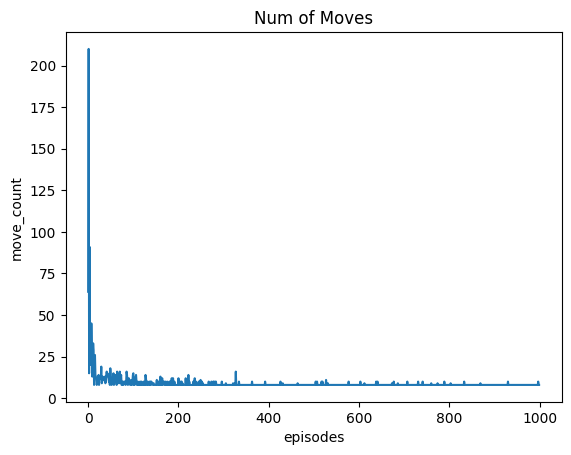

In [ ]:
# 1000 에피소드에서 에이전트의 이동 횟수를 시각화
plt.plot(total_moves)
plt.ylabel('move_count')
plt.xlabel('episodes')
plt.title('Num of Moves')
plt.show()